<a href="https://colab.research.google.com/github/itshendson/pytorch-linear-regression-model/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

The PyTorch workflow:
* Prepare and load data
* Build Model
* Fitting data to model (training)
* Make predictions and evaluate model


In [94]:
import torch as torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn # Neural Network from PyTorch

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

## 1. Prepare and load data

Data can be almost anything

- Excel spreadsheet
- Images
- Videos
- Audio
- DNA
- Text

Machine learning is to part:
1. Encode data to numeric form (also called numerical representation)
2. Build a model to learn patterns of the numerical representation

Let's create some known data with linear regression: y = mx + b

We'll use a linear regression formula to make a straight line with known **parameters**.

In [95]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create dataset
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

# Note: Imagine we didn't know the formula and only know our ideal output (y) and our input (X), machine learning tries to figure out the rest

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [96]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

Let's create a training and test set with our data. 

Usually 60 - 80% is training. Rest is testing.




In [97]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize, visualize, visualize!

To help understand the data split we just created.

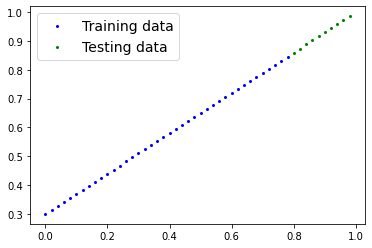

In [98]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist.
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

plot_predictions();

## 2. Build model

The first PyTorch model!

Almost everything in PyTorch inherits from nn.Module.

* Start with random values for weights and bias
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values
* It does so with the main algorithms:

  1. Gradient descent
  2. Backpropagation

In [99]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data (training data)
    return self.weights * x + self.bias # this is the lienar regression formula

    

### PyTorch model building essentials

* torch.nn - contains all of the buildings for ocmputational graphs (aka neural network)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from tornch.nn will set these for us
* torch.nn.Module - the base class for all neural network moduels, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* forward() - all nn.Module subclasses requrie you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

We can check our model parameters using .parameters()


In [100]:
from torch.nn.modules.linear import Linear
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model = LinearRegressionModel()

# Check out the parameters. Note that we set the manual_seed above.
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [101]:
# List named parameters. These values below are what we are trying to move closer to the ideal value of .7 and .3
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on X_test

When we pass data through our model, it's going to run it through the `forward()` method

In [102]:
X_test, y_test # this is the data we are going to pass to our model. In a perfect case, it will output y_test exactly

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [103]:
#  Make ppredictions with model
with torch.inference_mode(): # this line makes your code faster by not needing to track every variables when making predictions
  y_preds = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

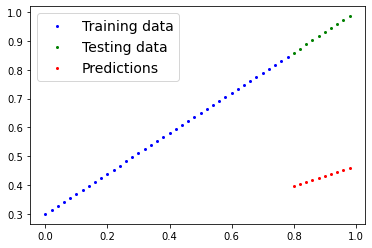

In [104]:
# If we plot our predictions it is very far from what it should be. That is because weights and bias are initialzied randomly.
plot_predictions(predictions=y_preds)

## 3. Train model

The idea is for a model to move from some unknown parameters (these may be 
random) to some known parameter

In other words, from a poor representation to a better representation.

One way to measure how poor the predictions are is to use a loss function.

Loss function also named criterion or cost function.

**Things we need to train:**

**Loss function:** A function to measure how wrong your model's predictions are to the ideal model, lower is better. PyTorch provides many loss functions for use.

**Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (ie. weight & bias) to improve the loss function. Optimizer nudges the parameters to improve loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [105]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [106]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [107]:
# Setup a loss function. L1Loss is the mean absolute loss method
loss_fn = nn.L1Loss()

# Setup an optimizer (SGD = stochastic gradient descent is one type of in-built optimizer)
# SGD just randomly adjusts the weights & bias and if it minimizes the floss function it keeps going in that direction, if it does not it goes in the opposite direction
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01) #lr is learning rate (most important hyperparameter you can set) the larger the lr the more it adjusts the parameters each loop

In [108]:
# Which loss function and optimizer you use depends on your specific problem. Requires experience to get better.


### Building a training and testing loop in PyTorch

We need a couple things in a training loop:
0. Loop through the data
1. Forward pass (passing data through `forward()`) to make predictions on data
2. Calculate the loss function (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backwards - move backwards through network to calculate the gradients of each of the parameters with rest to the loss 
5. Optimizer step - use optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [109]:
# An epoch is one loop through the data (epochs is a hyperparameter meaning we set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode in PyTorch
  model.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
  
  #1. Forward pass
  y_pred = model(X_train)

  #2. Calculate the loss function
  loss = loss_fn(y_pred, y_train)
  # print(f"loss: {loss}") # The more iterations we have the lower the loss value should be!

  #3. Optimzer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to parameters of the model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so we have to zero them above in step 3 for the next iteration of the loop

  model.eval() # turn off gradient tracking and other settings not needed for evaluation and testing to make code faster
  with torch.inference_mode(): # may also use torch.no_grad
    # 1. Do the forward pass
    test_pred = model(X_test)

    # 2 Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # See what is happening, code not needed.
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [110]:
with torch.inference_mode():
  y_preds_new = model(X_test)

In [111]:
# Our ideal weight and bias values.
weight, bias

(0.7, 0.3)

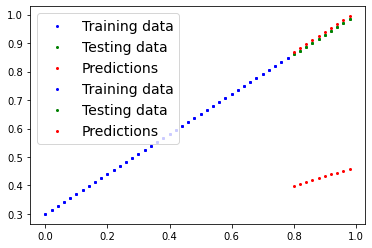

In [112]:
plot_predictions(predictions=y_preds)
plot_predictions(predictions=y_preds_new)

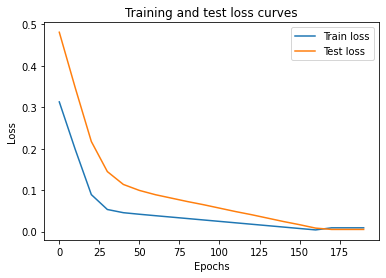

In [113]:
# Graph the loss
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()